In [2]:
    import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

In [14]:
db = pd.read_csv("capture20110818-2.binetflow")
#db['Sport'] = db['Sport'].astype(int)
#db['Dport'] = db['Dport'].astype(int)

ValueError: invalid literal for int() with base 10: '0x0303'

In [4]:
print(db)

                         StartTime         Dur Proto         SrcAddr  Sport  \
0       2011/08/18 15:39:35.087798   83.062141   tcp   147.32.84.202   1078   
1       2011/08/18 15:39:35.087915  497.720459   tcp  88.100.184.137  13121   
2       2011/08/18 15:39:35.091007  971.288147   tcp     147.32.84.2     80   
3       2011/08/18 15:39:35.091585  899.996399   tcp    90.181.84.58  54518   
4       2011/08/18 15:39:35.093493   38.753445   tcp   147.32.86.116  19083   
...                            ...         ...   ...             ...    ...   
107246  2011/08/18 15:55:46.347093    0.000313   udp    147.32.85.25  57375   
107247  2011/08/18 15:55:46.357022    0.000000   udp    147.32.84.59  63550   
107248  2011/08/18 15:55:46.357936    0.001958   udp    91.144.30.99  59481   
107249  2011/08/18 15:55:46.379560    0.000258   udp    147.32.85.25  57012   
107250  2011/08/18 15:55:46.379941    0.000246   udp    147.32.85.25  52134   

          Dir        DstAddr  Dport    State  sTos 

In [5]:
db['Label'].unique()

array(['flow=Background', 'flow=Background-Established-cmpgw-CVUT',
       'flow=From-Normal-V52-Grill', 'flow=To-Background-Stribrek',
       'flow=Background-google-analytics4',
       'flow=Background-UDP-Established',
       'flow=From-Background-CVUT-Proxy',
       'flow=Background-Attempt-cmpgw-CVUT',
       'flow=Background-UDP-Attempt',
       'flow=To-Background-UDP-CVUT-DNS-Server',
       'flow=To-Background-CVUT-Proxy',
       'flow=Background-UDP-NTP-Established-1',
       'flow=Background-TCP-Established', 'flow=Background-TCP-Attempt',
       'flow=Background-ajax.google',
       'flow=Background-google-analytics10',
       'flow=Background-google-analytics11', 'flow=From-Normal-V52-Jist',
       'flow=Background-google-webmail',
       'flow=To-Background-CVUT-WebServer',
       'flow=Background-google-analytics1',
       'flow=From-Normal-V52-Stribrek',
       'flow=Background-google-analytics15',
       'flow=Background-google-analytics12',
       'flow=Background-goo

In [6]:
malicious = list(filter(lambda x: "Botnet" in x, db['Label'].unique()))

In [7]:
print(malicious)

['flow=From-Botnet-V52-1-UDP-DNS', 'flow=From-Botnet-V52-1-TCP-HTTP-Google-Net-Established-6', 'flow=From-Botnet-V52-1-UDP-Attempt', 'flow=From-Botnet-V52-2-UDP-DNS', 'flow=From-Botnet-V52-2-TCP-HTTP-Google-Net-Established-6', 'flow=From-Botnet-V52-3-UDP-DNS', 'flow=From-Botnet-V52-2-UDP-Attempt', 'flow=From-Botnet-V52-3-TCP-HTTP-Google-Net-Established-6', 'flow=From-Botnet-V52-3-UDP-Attempt', 'flow=From-Botnet-V52-3-TCP-CC106-IRC-Not-Encrypted', 'flow=From-Botnet-V52-1-TCP-Established', 'flow=From-Botnet-V52-2-TCP-CC106-IRC-Not-Encrypted', 'flow=From-Botnet-V52-2-ICMP', 'flow=From-Botnet-V52-1-ICMP']


In [8]:
all_bad_db = db[db["Label"].isin(malicious)]
all_good_db = db[~ db["Label"].isin(malicious)]
all_bad_db

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
53987,2011/08/18 15:47:57.983212,0.000197,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,203,64,flow=From-Botnet-V52-1-UDP-DNS
54222,2011/08/18 15:48:00.231242,0.020501,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,590,87,flow=From-Botnet-V52-1-UDP-DNS
54225,2011/08/18 15:48:00.252763,0.036866,tcp,147.32.84.165,1027,->,74.125.232.201,80,SRPA_SPA,0.0,0.0,7,882,629,flow=From-Botnet-V52-1-TCP-HTTP-Google-Net-Est...
54485,2011/08/18 15:48:02.467929,0.000668,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,479,76,flow=From-Botnet-V52-1-UDP-DNS
54486,2011/08/18 15:48:02.477619,3.012514,udp,147.32.84.165,123,->,65.55.56.40,123,INT,0.0,NaN,2,180,180,flow=From-Botnet-V52-1-UDP-Attempt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,2011/08/18 15:54:55.589358,0.000000,icmp,147.32.84.165,0x75a4,->,147.32.96.69,NaN,UNK,0.0,NaN,1,1066,1066,flow=From-Botnet-V52-1-ICMP
102054,2011/08/18 15:54:55.589534,0.000000,icmp,147.32.84.165,0xf88e,->,147.32.96.69,NaN,UNK,0.0,NaN,1,1066,1066,flow=From-Botnet-V52-1-ICMP
102055,2011/08/18 15:54:55.591005,0.000000,icmp,147.32.84.165,0x903f,->,147.32.96.69,NaN,UNK,0.0,NaN,1,1066,1066,flow=From-Botnet-V52-1-ICMP
102057,2011/08/18 15:54:55.591947,0.000000,icmp,147.32.84.165,0x0744,->,147.32.96.69,NaN,UNK,0.0,NaN,1,1066,1066,flow=From-Botnet-V52-1-ICMP


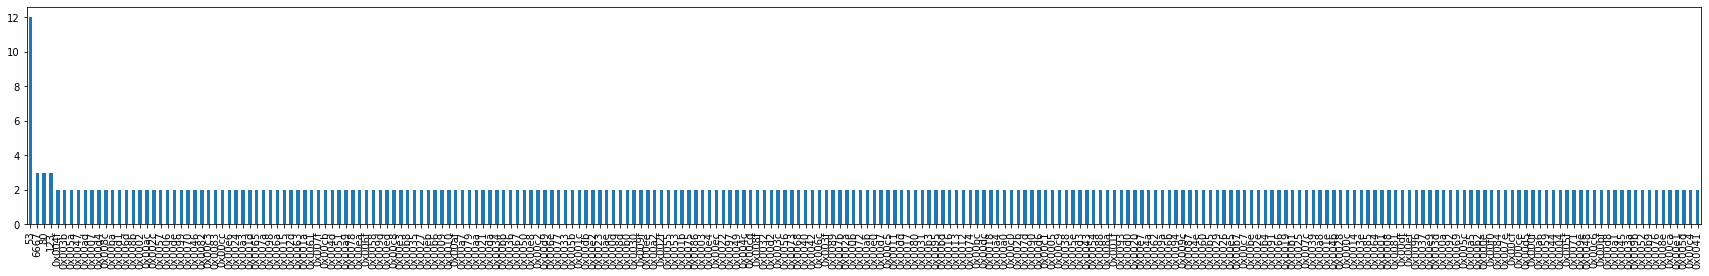

In [37]:
plt.figure();

#all_bad_db['Dport'].plot(kind="bar");
#all_bad_db['Dport'].count()#.plot(kind='bar')
#all_bad_db['Dport'].value_counts().plot.hist(bins= 3000,rwidth=None, color='#607c8e', stacked=True)
ax = all_bad_db['Dport'].value_counts().plot(kind='bar',
figsize=(30, 4),
 #                                        title=title,
 #                                        color=[c.values]
                                    )

In [23]:
all_bad_db['Dport'].value_counts()

53        12
6667       3
80         3
123        3
0x004f     2
          ..
0x00ca     2
0x00e1     2
0x005d     2
0x00c4     2
0x0041     2
Name: Dport, Length: 244, dtype: int64